# CNN for text classification

## Overview

When working with texts, we want to analyse the input following the sequence of token.
Using CNN-terminology, this means analysing the input over time.

CNNs over texts perform 1-dimesion covolutions.

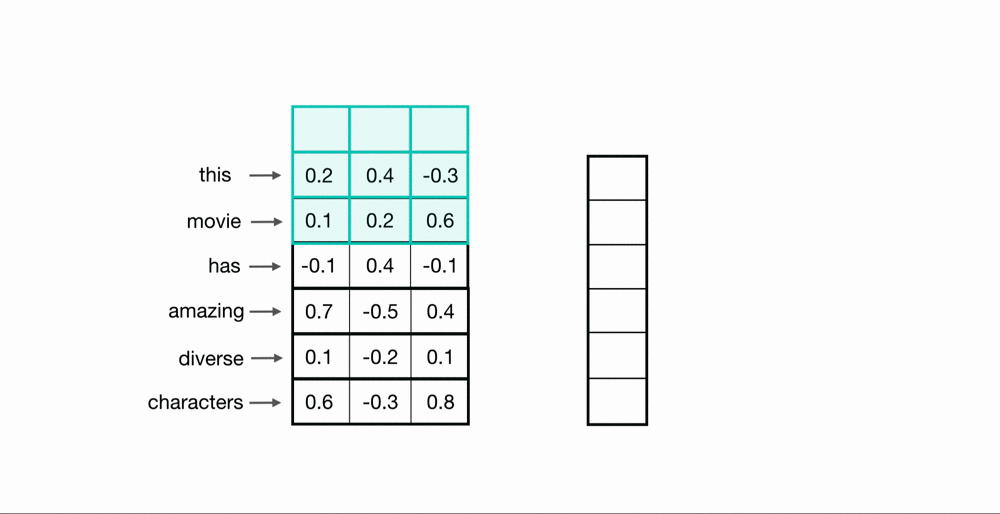

(The visual sample is taken from [here](https://cezannec.github.io/CNN_Text_Classification/).)

It is important to notice that "1-dimension" refers to the number of directions we want the kernel to move, and not to the dimensionality of the input.
In the example above we can see that the input is 2D, but the convolutional operation applied on it is 1D.

## PyTorch
With Pytorch, we have 2 equivalent ways to implement CNNs over text: one is using the module torch.nn.conv1d and the other one is using the module torch.nn.conv2d.
Note that both of them work on 2-dimensional input.

Below I am going to show a minimalistic sample for both the implementations.

### Parameters
Below I define the parameters we need.

In [101]:
# Input
batch = 2
seq_len = 5
emb_size = 3

# Convolution
kernel = 2
in_channel = 1
out_channel = 6

Therefore, our input will be a tensor [batch, seq_len, emb_size].

In [102]:
import torch
from torch import nn

input_array = torch.rand(batch, seq_len, emb_size)

print(f'Input shape: {input_array.shape}')

Input shape: torch.Size([2, 5, 3])


### Convolutional layers
For the definition of the convolutional layers I will refer to the PyTorch documentation:
- conv1d: https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv1d
- conv2d: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

#### Conv1d
The input of conv1d is [batch, input_channels, sequence_lenght].

In this case the number of input_channels is the embedding size.

The kernel, instead, is an integer, indicating the n-gram we want to consider.
Notice that, as the input is 2d, the kernel-windows sliding over it (blue rectangle in the previous example) has to be 2d as well.
It moves over time, the third dimension of the input, and so PyTorch automatically sets the "missing" dimension to the second dimension of the input (the embedding size).
It does not use the first dimension (batch size) as it would not make sense to go over different sample.

In [103]:
conv1d = nn.Conv1d(in_channels=emb_size, out_channels=out_channel, kernel_size=kernel)

#### Conv2d
The input of conv2d is [batch, input_channels, input_height, input_width].

Last two dimensions are the sequence_lenght and the embedding_size respectively (see example above).

The input_channels here can be used similarly to how they are used with images.
If we want to encode the input sentence with multiple embedding types (e.g. pre-trained embeddings static and non-static), we can increase the input_channel parameter (in this minimalistic sample we keep it simple with just one input_channel).

The kernel has to be defined as a rectangle with the height corresponding to the n-gram and the width to the input_width (the embedding_size).

In [104]:
conv2d = nn.Conv2d(in_channels=in_channel, out_channels=out_channel, kernel_size=(kernel, emb_size))

### Convolutional operations
Before perform the convolutional operations, we need to reshape the input in order to fit the convolutional layers.

In [105]:
input_conv1d = input_array.permute(0,2,1)
input_conv2d = input_array.view(batch, in_channel, seq_len, emb_size)

In order to obtain the same result, we need to set the filter weights and the bias of the convolutional layers to the same values (for simplicity I will set everything to 1).

In [106]:
conv1d.weight = torch.nn.Parameter(torch.ones_like(conv1d.weight))
conv2d.weight = torch.nn.Parameter(torch.ones_like(conv2d.weight))

conv1d.bias = torch.nn.Parameter(torch.ones_like(conv1d.bias))
conv2d.bias = torch.nn.Parameter(torch.ones_like(conv2d.bias))

#### Output conv1d

In [107]:
out1 = conv1d(input_conv1d)
print(out1.shape)
print(out1)

torch.Size([2, 6, 4])
tensor([[[3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688]],

        [[3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773]]],
       grad_fn=<SqueezeBackward1>)


#### Output conv2d

In [108]:
out2 = conv2d(input_conv2d).squeeze(3)
print(out2.shape)
print(out2)

torch.Size([2, 6, 4])
tensor([[[3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688],
         [3.782865, 4.515967, 4.565298, 3.671688]],

        [[3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773],
         [3.799099, 2.925763, 3.665675, 4.211773]]],
       grad_fn=<SqueezeBackward1>)


Comparing the results, we can see that the above implementations using torch.nn.conv1d and torch.nn.conv2d perform the same operation.